## EJERCICIO KNN GRUPO Ralphy,Gabriel, Made y Mercedes

#### ENUNCIADO:
<p>Vas a realizar ahora un estudio utilizando KNN. Después compara los resultados con Regresión Logística.

Busca cuáles son los hiperparámetros que pueden ajustarse en KNN (además del número de vecinos) y utiliza los métodos que comentamos de búsqueda en rejilla(GridSearchCV) y búsqueda aleatoria(RandomizedSearchCV) para encontrar los valores óptimos para ellos.<p>

[Descarga del CSV de "Breast Cancer"](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

## Imports 📃

#### Importamos la librerías necesarias para este proyecto.
- En este caso, necesitaremos, como hemos utilizado anteriormente:
    - Sklearn: para poder entrenar a nuestro modelo, poder acceder al algoritmo knn, al randomizer...
    - Matplotlib y seaborn: para poder representar gráficamente nuestros resultados, la coorrelación entre variables...
    - Pandas: para poder leer el CSV.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import  KNeighborsClassifier 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error ,r2_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA


## Cargamos el CSV 📄

#### Aquí cargaremos el CSV, eliminando una columna que se llama "Unnamed 32" la cuál no contiene datos, solo valores nulos, traducimos las columnas a español para poder tratar mejor los datos y luego mostramos el dataset.

In [3]:
df = pd.read_csv('Breast_Cancer.csv')

df = df.drop("Unnamed: 32",axis=1)

df.columns=["id", "diagnostico", "radio_medio", "textura_media", "perimetro_medio", "area_media", "suavidad_media", "compacidad_media"," concavidad_media", "media_puntos_concavidad", "media_simetria", "media_dimension_fractal", "radio_se", "textura_se", "perimetro_se"," area_se", "suavidad_se", "compacidad_se", "concavidad_se"," concavo_puntos_se"," simetria_se", "fractal_dimension_peor", "radio_peor", "textura_peor", "perimetro_peor"," area_peor", "suavidad_peor"," compacidad_peor", "concavidad_peor", "puntos_concavos_peor"," simetia_peor"," fractal_dimension_peor"]

df

,id,diagnostico,radio_medio,textura_media,perimetro_medio,area_media,suavidad_media,compacidad_media,concavidad_media,media_puntos_concavidad,...,radio_peor,textura_peor,perimetro_peor,area_peor,suavidad_peor,compacidad_peor,concavidad_peor,puntos_concavos_peor,simetia_peor,fractal_dimension_peor
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### Como se puede observar, la columna de diagnóstico tiene valores char, M si el cáncer es maligno y B si el cáncer es benigno. 🦠🧫
<p>Tras detectar esto, decidimos transformar esos valores en 1 y 0: 1 si es maligno, por lo tanto importante de tratar(true) y 0 si es benigno(false)<p>
<p>Además, dividiremos los datos en x e y, x serán las características que nos ayudarán a identificar si es maligno o benigno e y será el diagnóstico, que es lo que queremos predecir a través de esas características.<p>

In [4]:

X_normal  = df[["radio_medio", "textura_media", "perimetro_medio", "area_media", "suavidad_media", "compacidad_media"," concavidad_media", "media_puntos_concavidad", "media_simetria", "media_dimension_fractal", "radio_se", "textura_se", "perimetro_se"," area_se", "suavidad_se", "compacidad_se", "concavidad_se"," concavo_puntos_se"," simetria_se", "fractal_dimension_peor", "radio_peor", "textura_peor", "perimetro_peor"," area_peor", "suavidad_peor"," compacidad_peor", "concavidad_peor", "puntos_concavos_peor"," simetia_peor"," fractal_dimension_peor"]]
df['diagnostico'] = df.diagnostico.map({'M' : 1, 'B' : 0 })
y_normal = df['diagnostico']
y_normal

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnostico, Length: 569, dtype: int64

#### Ahora representaremos en una gráfica para ver cuantos diagnósticos son benignos y cuantos son malignos para poder hacer una previa visualización de como deberían ser los datos.

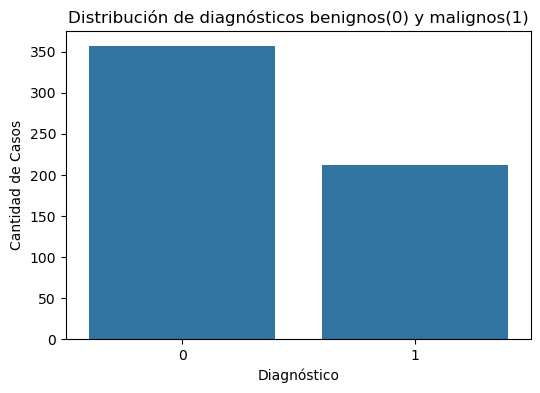

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnostico', data=df)

plt.title('Distribución de diagnósticos benignos(0) y malignos(1)')
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad de Casos')

plt.show()


#### Split de los datos en un 80/20(80% train y 20% test) 🏋️‍♀️

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_normal, y_normal, test_size=0.2, random_state=0)
#El test serán 114 datos y el train 456

##### Ahora vamos a ver, a través del random search, cuál cree que es el mejor número de vecinos que debe emplear el knn para poder realizar una búsqueda adecuada.
<p>Esto se hace debido a que si utilizamos pocos vecinos la búsqueda no reflejará la realidad ya que estaremos buscando en un grupo muy reducir, y si hacemos una búsqueda con muchos vecinos nos arriesgamos a que el grupo sea muy grande y por lo tanto el algoritmo se disperse demasiado.<p>

<p>Primero lo haremos con RandomSearch y TODOS los valores de x, que buscará la mejor cantidad de vecinos a través de los datos dados. Como se puede observar, el rango de los vecinos es entre 1 y 12, ya que es lo que COMO norma general, el mínimo y máximo de vecinos que se suele tomar.<p>

In [7]:
 #Primero lo haremos con knn y un número fijo de vecinos, por ejemplo 6
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.956140350877193

#### Como podemos observar, el accuracy no está nada mal, pero es mejorable, por lo tanto vamos a utilizar el random search para encontrar los mejores hiperparámetros.

In [8]:

# Definición del modelo KNN con TODAS LAS VARIABLES
knn = KNeighborsClassifier()

param_distributions = {
    'n_neighbors': range(1, 12),
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}

# Utilizando el RandomSearch para encontrar el mejor número de vecinos
random_search_knn = RandomizedSearchCV(knn, param_distributions, n_iter=44, cv=5, random_state=0)
random_search_knn.fit(X_train, y_train)

print("Mejores hiperparámetros:", random_search_knn.best_params_)




Mejores hiperparámetros: {'weights': 'distance', 'p': 1, 'n_neighbors': 6}


#### Como podemos observar en el print de arriba, el mejor número de vecinos indicado por el random search para realizar el Knn es de 6, por lo tanto utilizaremos esos vecinos. 🏠🏘️

#### Ahora, imprimiremos el accuracy que nos da con esos valores de test(previamente partido)

In [9]:
random_search_knn.score(X_test, y_test) 

0.9473684210526315

#### VAYA!😯 Ha dado menor acierto, igual deberíamos descartar ciertos datos que puede que estén influyendo en nuestro random search. Para ello, hagamos primero un visual de las coorelaciones.

### Dibujar el mapa de calor 🗺️
<p>Este mapa de calor es MUY grande, por lo tanto no se va a observar del todo bien, pero igualmente lo hemos incluído ya que es necesario para el tratamiento de datos, debido a que nos ayuda a PODER DESCARTAR(no siempre se deben descartar) columnas que no influyan apenas en el cálculo de la variable que queremos predecir.<p>

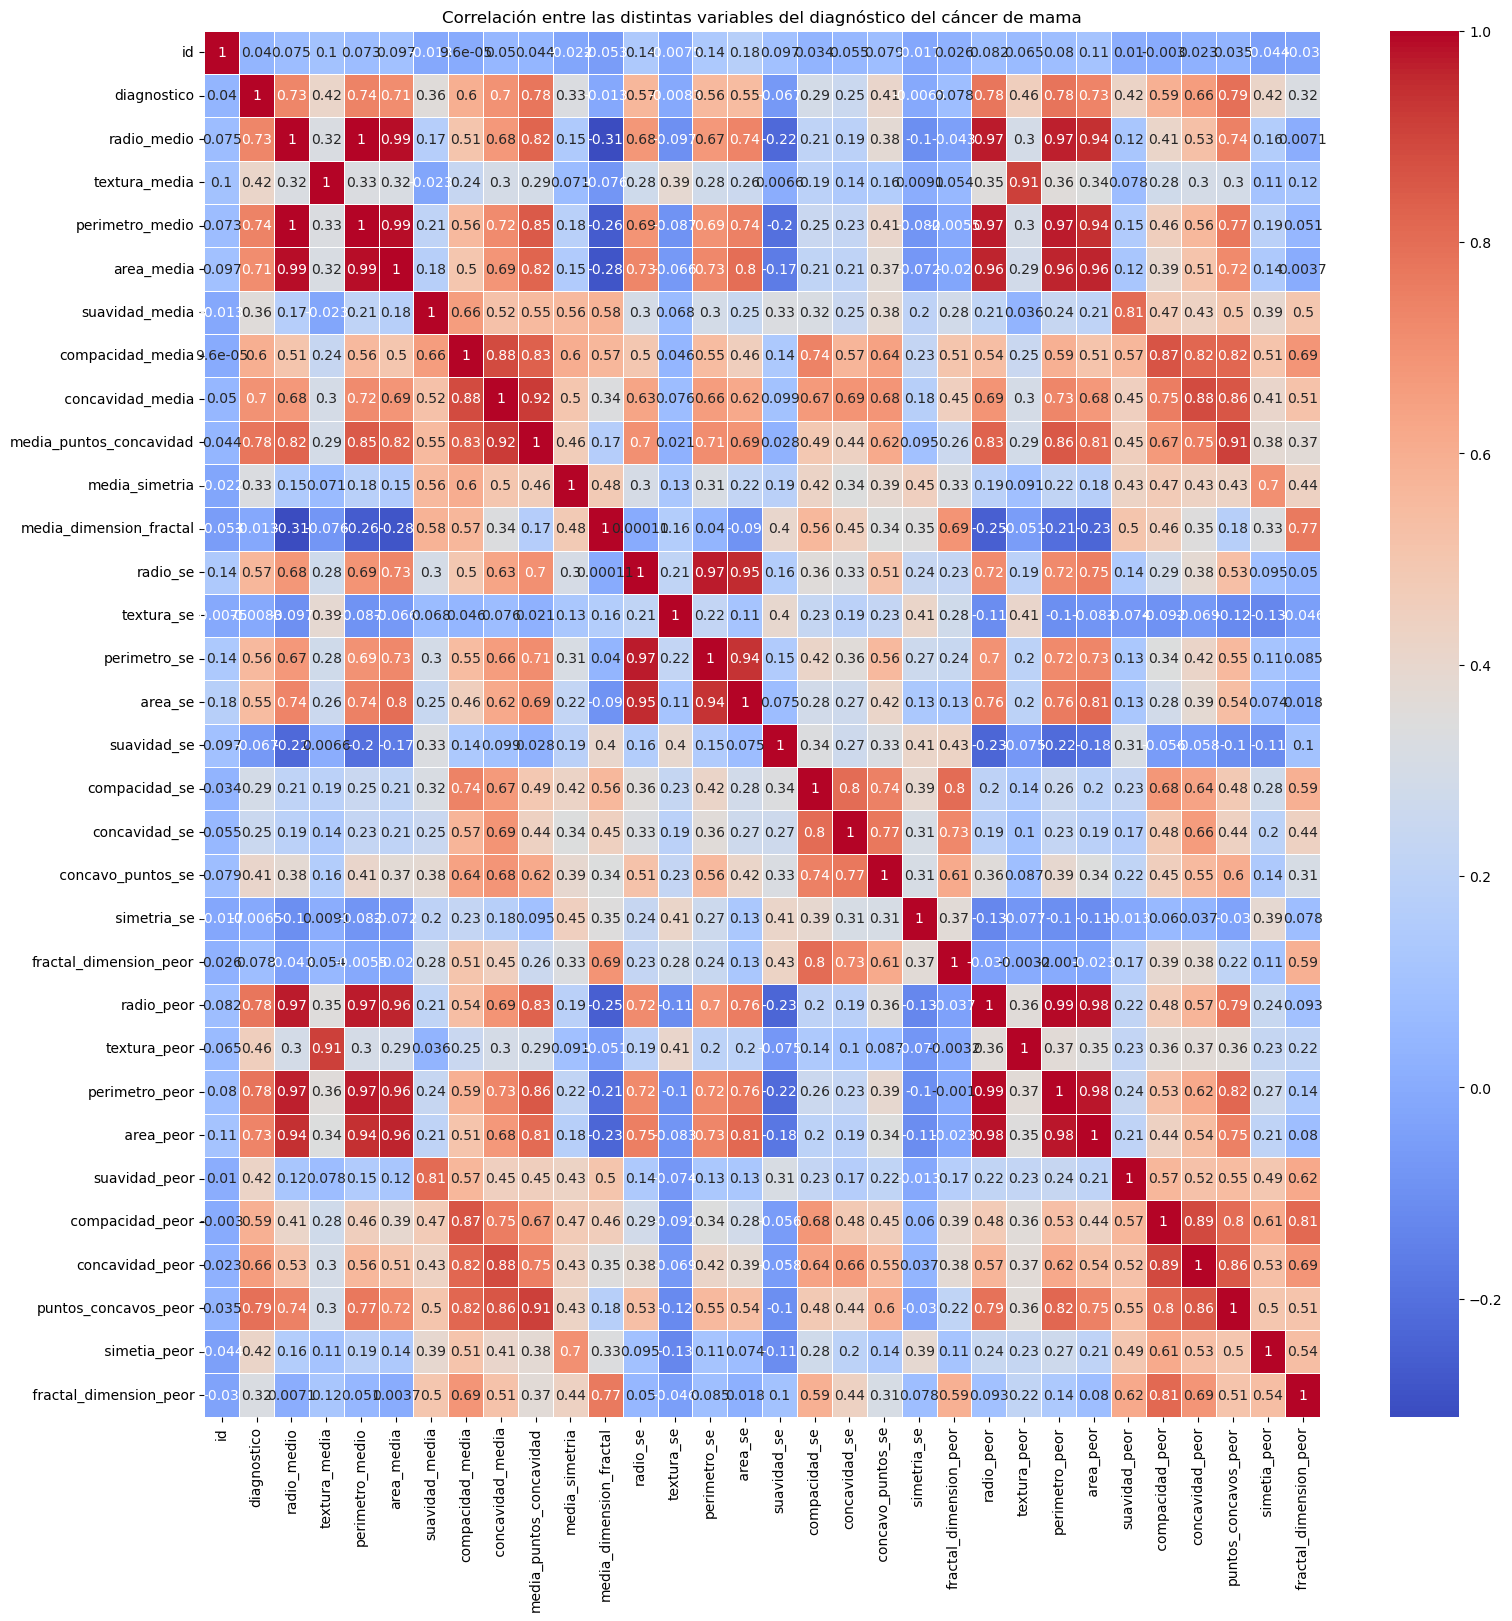

In [10]:
plt.figure(figsize=(18,18))
plt.title("Correlación entre las distintas variables del diagnóstico del cáncer de mama")
sns.heatmap(df.corr(), linewidths=0.5, cmap="coolwarm", annot=True)
plt.show()

#### Conclusiones 💡✅

 Hemos determinado, gracias a nuestro mapa de calor, que los siguientes campos son los más relacionados para obtener el diagnóstico: 
 - radio_medio.
 - textura_medio 
 - perimetro_medio 
 - área_media.
 - compacidad_media.
 - concavidad_media.
 - media_puntos_concavidad.
 - radio_peor.
 - textura_peor. 
 - perimetro_peor. 
 - área_peor.
 - compacidad_peor.
 - concavidad_peor.
 - puntos_concavos_peor.


<p>Ahora, realizaremos el entrenamiento unicamente con los datos anteriormente listados, tanto con gridsearch como con randomsearch.<p>

#### CON RANDOM SEARCH

In [11]:
X_importantes  = df[["radio_medio", "textura_media", "perimetro_medio", "area_media", "compacidad_media"," concavidad_media", "media_puntos_concavidad", "radio_peor", "textura_peor", "perimetro_peor"," area_peor"," compacidad_peor", "concavidad_peor", "puntos_concavos_peor"]]
y_importantes = df['diagnostico']


X_trainRandom, X_testRandom, y_trainRandom, y_testRandom = train_test_split(X_importantes, y_importantes, test_size=0.2, random_state=0)


knn = KNeighborsClassifier()

# Distribución de hiperparámetros a explorar
param_distributions = {
    'n_neighbors': range(1, 12),
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}

# Random Search
random_search_knn = RandomizedSearchCV(knn, param_distributions, n_iter=44, cv=5, random_state=0)
random_search_knn.fit(X_trainRandom, y_trainRandom)

print("Mejores hiperparámetros random search:", random_search_knn.best_params_)

random_search_knn.score(X_testRandom, y_testRandom) 

prediccionesRandom = random_search_knn.predict(X_testRandom)

accuracyRandom = accuracy_score(y_testRandom, prediccionesRandom)

print(f'Precisión del clasificador k-NN con random search y con las clases seleccionadas: {accuracyRandom:.3f}')
mse_random = mean_squared_error(y_testRandom, prediccionesRandom)
r2_lineal = r2_score(y_testRandom,prediccionesRandom)

print(f"KNN fallo cuadrático - MSE: {mse_random:.3f}")
print(f"KNN- R²: {r2_lineal:.3f}")

Mejores hiperparámetros random search: {'weights': 'uniform', 'p': 1, 'n_neighbors': 8}
Precisión del clasificador k-NN con random search y con las clases seleccionadas: 0.965
KNN fallo cuadrático - MSE: 0.035
KNN- R²: 0.855


#### CON GRIDSEARCH

In [12]:
X_trainGrid, X_testGrid, y_trainGrid, y_testGrid = train_test_split(X_importantes, y_importantes, test_size=0.2, random_state=0)


knn = KNeighborsClassifier()

# Distribución de hiperparámetros a explorar
param_distributions = {
    'n_neighbors': range(1, 12),
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}

#Grid Search
grid_search_knn =  GridSearchCV(knn, param_distributions, cv=5)
grid_search_knn.fit(X_trainGrid, y_trainGrid)

print("Mejor hiperparámetros grid search:", grid_search_knn.best_params_)

grid_search_knn.score(X_testGrid, y_testGrid) 

prediccionesGrid = grid_search_knn.predict(X_testGrid)

accuracyGrid = accuracy_score(y_testGrid, prediccionesGrid)

print(f'Precisión del clasificador k-NN con grid search y con las clases seleccionadas: {accuracyGrid:.3f}')
mse_random = mean_squared_error(y_testGrid, prediccionesGrid)
r2_lineal = r2_score(y_testGrid,prediccionesGrid) 

print(f"KNN fallo cuadrático - MSE: {mse_random:.3f}")
print(f"KNN- R²: {r2_lineal:.3f}")

Mejor hiperparámetros grid search: {'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
Precisión del clasificador k-NN con grid search y con las clases seleccionadas: 0.965
KNN fallo cuadrático - MSE: 0.035
KNN- R²: 0.855


#### Como se puede observar, la accuracy aumenta y el número de vecinos cambia gracias a la utilización de datos que tienen más relevancia. 😯🫢
<p>Esto se puede deber a que hay tantas variables, que aunque tengan una influencia, es mínima o inferior a las demás, y por lo tanto pasa a ser casi irrelevante, lo que produce un desajuste en nuestro modelo que provoca una menor certeza. Además, se puede observar que los dos tipos de búsqueda dan resultados idénticos debido a que estos métodos tienen como objetivo buscar los hiperparámetros más acetados.<p>

#### Ahora, pasaremos a representar los datos gráficamente, para ver que tan acertado es nuestro algoritmo y si se puede utilizar. 🤩

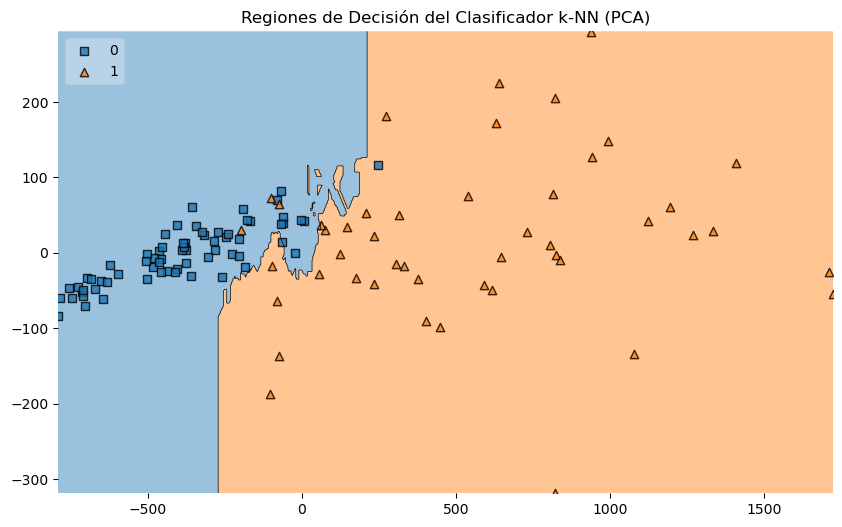

In [13]:

# Reducción de dimensionalidad con PCA (2 componentes principales)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_trainGrid)
X_test_pca = pca.transform(X_testGrid)

# Ajustar el mejor modelo k-NN encontrado por GridSearch
knn_best = grid_search_knn.best_estimator_
knn_best.fit(X_train_pca, y_trainGrid)

# Visualización de las regiones de decisión
plt.figure(figsize=(10, 6))
plot_decision_regions(X=X_test_pca, y=y_test.values, clf=knn_best, legend=2)

plt.title("Regiones de Decisión del Clasificador k-NN (PCA)")

plt.show()

### Matriz de confusión de knn para la comparativa con la logística.

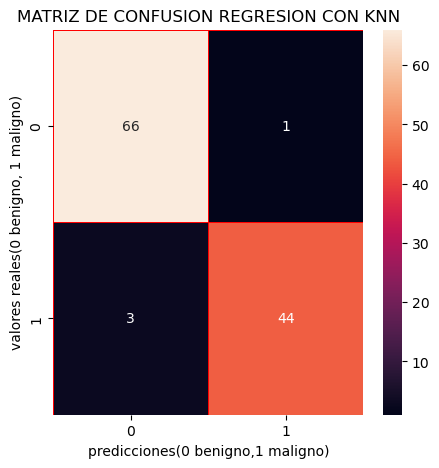

In [14]:
cm= confusion_matrix(y_testGrid,prediccionesGrid) 

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("predicciones(0 benigno,1 maligno)")
plt.ylabel("valores reales(0 benigno, 1 maligno)")
plt.title("MATRIZ DE CONFUSION REGRESION CON KNN")
plt.show()

#### En la matriz de confusión se representan los valores de la predicción(test grid) que, como he explicado más arriba, son 114 en total.
<p>Se puede observar que se identifican correctamente gracias a la matriz de confusión donde, 66 benignos fueron identificados correctamente como benignos, mientras que 3 benignos fueron identificados como malignos. Por el otro lado, 44 casos malignos fueron identificados como malignos, y solo 1 caso maligno fue mal identificado como benignos por nuestra IA.💯<p>


### Estadísticas de KNN

In [15]:
print("Las estadísticas son: ")
print(classification_report(y_test,prediccionesGrid))


Las estadísticas son: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Podemos observar que las estadísticas son bastante buenas.

## Pasamos ahora a la regresión logística

#### Primero lo haremos con puntos cóncavos, que es lo que más influye en el diagnóstico.

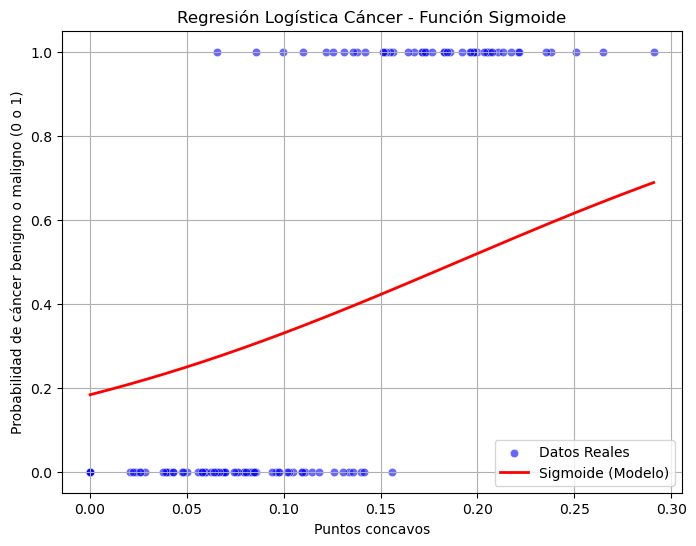

In [16]:
x_puntos=df[["puntos_concavos_peor"]]
y_puntos=df["diagnostico"]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x_puntos, y_puntos, test_size=0.2, random_state=0)

# Crear el modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
prediccionLogical=modelo.predict(X_test)
# Crear un rango para la predicción de la curva sigmoide
X_range = np.linspace(x_puntos.min().values[0], x_puntos.max().values[0], 300).reshape(-1, 1)

# Convertir el rango a DataFrame con el nombre de la columna correcto
X_range_df = pd.DataFrame(X_range, columns=["puntos_concavos_peor"])

# Predecir las probabilidades usando el DataFrame
y_prob = modelo.predict_proba(X_range_df)[:, 1]

# Graficar los puntos reales y la curva sigmoide
plt.figure(figsize=(8,6))

# Puntos reales del dataset
sns.scatterplot(x=X_test['puntos_concavos_peor'], y=y_test, color='blue', label="Datos Reales", alpha=0.6)

# Curva sigmoide predicha por el modelo
plt.plot(X_range, y_prob, color='red', linewidth=2, label="Sigmoide (Modelo)")

# Etiquetas y título
plt.xlabel("Puntos concavos")
plt.ylabel("Probabilidad de cáncer benigno o maligno (0 o 1)")
plt.title("Regresión Logística Cáncer - Función Sigmoide")
plt.legend()
plt.grid(True)
plt.show()


#### Ahora lo haremos con area media, que también influye y queremos comprobar los resultados.

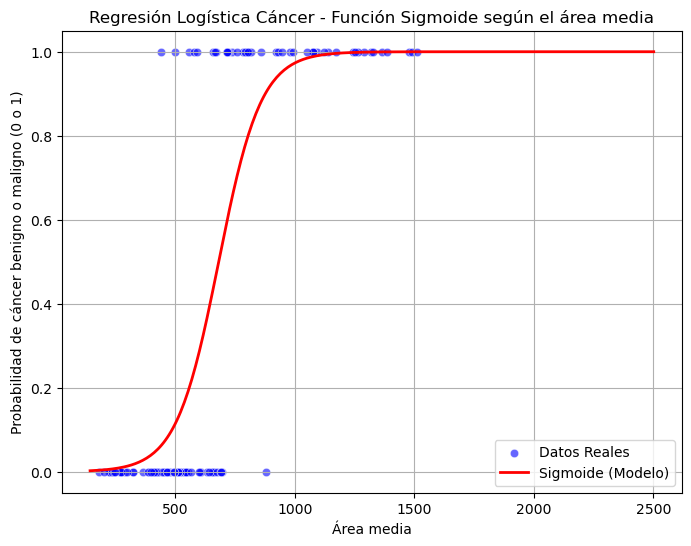

In [17]:
x_media_puntos=df[["area_media"]]
y_media_puntos=df["diagnostico"]
X_train, X_test, y_train, y_test = train_test_split(x_media_puntos, y_media_puntos, test_size=0.2, random_state=0)
# Asumimos que ya tienes el modelo entrenado
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
prediccionLogical=modelo.predict(X_test)
# Crear X_range correctamente como DataFrame con una sola columna 'area_media'
X_range = pd.DataFrame(np.linspace(X_train['area_media'].min(), X_train['area_media'].max(), 300).reshape(-1, 1), columns=['area_media'])

# Ahora puedes hacer la predicción de las probabilidades
y_prob = modelo.predict_proba(X_range)[:, 1]  # Probabilidad de cáncer benigno o maligno

# Graficar los puntos reales y la curva sigmoide
plt.figure(figsize=(8,6))

# Puntos reales del dataset
sns.scatterplot(x=X_test['area_media'], y=y_test, color='blue', label="Datos Reales", alpha=0.6)

# Curva sigmoide predicha por el modelo
plt.plot(X_range, y_prob, color='red', linewidth=2, label="Sigmoide (Modelo)")

# Etiquetas y título
plt.xlabel("Área media")
plt.ylabel("Probabilidad de cáncer benigno o maligno (0 o 1)")
plt.title("Regresión Logística Cáncer - Función Sigmoide según el área media")
plt.legend()
plt.grid(True)
plt.show()


#### Aquí mostramos la matriz de confusión 
<p>Aquí se muestran los true positives(casos que positivos que fueron identificados por nuestra IA como positivos), los false positive(casos negativos identificados como verdaderos por nuestro modelo), los true negative(casos negativos que fueron predecidos como negativos) y los false negative(casos positivos identificados como negativos por nuestra IA)

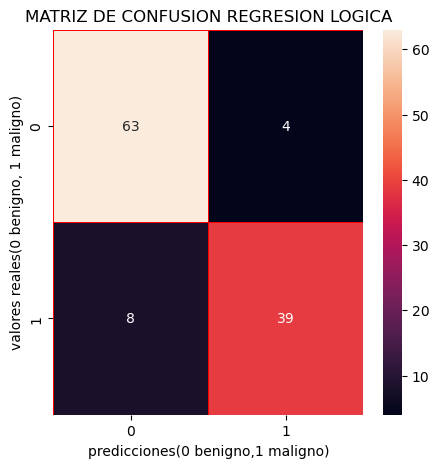

In [18]:
cm= confusion_matrix(y_test,prediccionLogical) 

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("predicciones(0 benigno,1 maligno)")
plt.ylabel("valores reales(0 benigno, 1 maligno)")
plt.title("MATRIZ DE CONFUSION REGRESION LOGICA")
plt.show()



#### En la matriz de confusión se representan los valores de la predicción(test) que, como he explicado más arriba, son 114 en total.
<p>Se puede observar que se identifican correctamente gracias a la matriz de confusión donde, 63 benignos fueron identificados correctamente como benignos, mientras que 8 benignos fueron identificado como malignos. Por el otro lado, 39 casos malignos fueron identificados como malignos, y solo 4 casos maligno fue mal identificados como benignos por nuestra IA.<p>

### Estadísticas

In [19]:
print(classification_report(y_test,prediccionLogical))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        67
           1       0.91      0.83      0.87        47

    accuracy                           0.89       114
   macro avg       0.90      0.89      0.89       114
weighted avg       0.90      0.89      0.89       114



#### Conclusiones
<p>Al principio hemos intentado realizar un modelo utilizando todos los datos del csv dado. Hemos podido observar que la accuracy no es mal(0.947). Posteriormente, hemos decidido hacer una matriz de coorrelaciones para poder identificar las variables más influyentes. Utilizando solo estas variables identificadas, pudimos observar que la accuracy subio a 0.965, es decir CASI 2 PUNTOS MÁS, lo que, aunque parezca insignificante, en el campo de la salud es un aumento considerable, sobre todo hablando de diagnósiticos de cáncer.<p>
<p>Además, hemos podido observar en la gráfica la buena predicción que tiene nuestro modelo EN CUANTO A CASOS BENIGNOS, siendo un poco más dispersa en los casos malignos.<p>
<p>Esto se puede observar de manera igualitaria en las regresones logísticas hechas con diferentes variables influyente, como pueden ser la concavidad o el área media. Esas regresiones, como se puede observar arriba, dan resultados bastante parecidos a los de la gráfica knn, siendo los benignos valores más juntos y más precisos, y los malignos siendo un poco más dispersos.<p>

<p>Por lo tanto, podemos concluír en que nuestro modelo tiene una accuracy completamente aceptable y se podría utilizar en el día a día, ya que, como se sabe, ningún modelo tiene 100% de precisión.<p>